In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
device = torch.device("cpu")

## Ładowanie danych

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_path = "./train"
dataset = torchvision.datasets.ImageFolder(root=dataset_path, transform=transform)

In [4]:
train_ratio = 0.8

train_size = int(train_ratio * len(dataset))
val_size = len(dataset) - train_size

train, val = torch.utils.data.random_split(dataset, [train_size, val_size])

In [5]:
labels = dataset.classes
print(labels)

['acoustic', 'antenna', 'bacteria', 'battery', 'bean', 'beetle', 'bicycle', 'birch', 'bird', 'bomb', 'bread', 'bridge', 'camera', 'carbon', 'cat', 'corn', 'crab', 'crocodilian', 'echinoderm', 'egg', 'elephant', 'fish', 'flower', 'frog', 'fungus', 'gauge', 'hammer', 'icecream', 'kangaroo', 'memorial', 'monkey', 'motor', 'nest', 'palm', 'pizza', 'pot', 'printer', 'saw', 'snake', 'spice', 'spider', 'spoon', 'squash', 'swine', 'tea', 'tomato', 'towel', 'truck', 'turtle', 'worm']


In [6]:
train_loader = torch.utils.data.DataLoader(train, batch_size=4, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val, batch_size=4, shuffle=True, num_workers=4)

train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

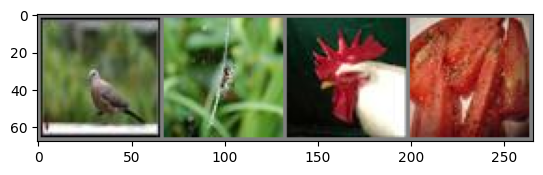

['bird', 'spider', 'bird', 'tomato']


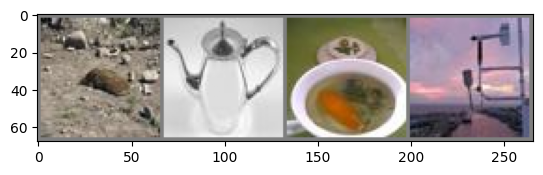

['swine', 'pot', 'tea', 'gauge']


In [7]:
imshow(torchvision.utils.make_grid(train_batch))
print([labels[i] for i in train_labels])
imshow(torchvision.utils.make_grid(val_batch))
print([labels[i] for i in val_labels])

## Trenowanie modelu

In [11]:
from models import Net
from helper_functions import train_model, get_accuracy

In [12]:
net = Net(num_classes=len(labels)).to(device)

train_loader = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [14]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net, train_loader, val_loader, criterion, optimizer, get_accuracy, device)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x2704 and 400x120)

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x=range(len(loss_hist)), y=loss_hist, ax=ax, label="loss")
sns.lineplot(x=range(len(train_eval_hist)), y=train_eval_hist, ax=ax, label="train accuracy")
sns.lineplot(x=range(len(val_eval_hist)), y=val_eval_hist, ax=ax, label="val accuracy")
plt.tight_layout()
plt.show()

## Ewaluacja modelu

In [ ]:
images, img_labels = next(iter(val_loader))
images = images[:4]

output = net(images.to(device))
_, preds = torch.max(output, 1)

imshow(torchvision.utils.make_grid(images))
print("True labels: ", [labels[i] for i in img_labels])
print("Predicted labels: ", [labels[i] for i in preds])

In [ ]:
final_acc = get_accuracy(net, val_loader, device)
print(f"Final accuracy: {final_acc}")